In [18]:
import tensorflow as tf

In [19]:
a = tf.Variable(3)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
from tqdm import tqdm_notebook as t
%matplotlib inline

1-Llegir les dades

In [21]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
a.eval()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


3

In [22]:
fitxers = ["../Data/"+str(i) for i in range(1,5)]

In [23]:
fitxers

['../Data/1', '../Data/2', '../Data/3', '../Data/4']

In [24]:
def ok(i):
    if derivatives[i,1] >= 0: 
        return False
    if abs(derivatives[i,0]) < 0.003:
        return True
        return (abs(derivatives[i,0]) - np.min(derivatives[max(i-2,0):i+2,0])) < 1e-3 
    return False

In [25]:
X = []
Y = []
for file in fitxers:
    cartesian = pd.read_csv(file+"Cart.csv").drop('Unnamed: 0', 1)
    polar = pd.read_csv(file+"Pol.csv").drop('Unnamed: 0', 1)
    derivatives = polar[['r-dot', 'r-dotdot']].as_matrix()
    z = [i for i in range(len(derivatives)) if ok(i)]
    z = [i for i in range(len(derivatives)) if ok(i)]
    z = [i for i in z if i+1 not in z and i+2 not in z and i+3 not in z]
    temps = list(cartesian['t'][z])
    angles = list(polar['phi'][z])
    radis = list(polar['r'][z])
    aux_vec = [(z[i+1]+z[i])/2 for i in range(len(z)-1)]
    for i in range(len(temps)-1):
        T = temps[i+1]-temps[i]
        sigma = abs(angles[i+1]-angles[i])-2*np.pi
        L = (radis[i+1]+radis[i])/2
        if int(aux_vec[i]) == int(aux_vec[i]+0.6):
            l = polar['r'][aux_vec[i]]
        else:
            l = 0.5*(polar['r'][int(aux_vec[i])] + polar['r'][int(aux_vec[i])+1]) 
        eps = np.sqrt(1-(l/L)**2)
        X.append([T,L,eps])
        Y.append(sigma)

In [26]:
X

[[1.3333333329999997, 0.347894693513415, 0.76713295170959417],
 [1.5388888890000008, 0.31112112539639253, 0.85708662657719636],
 [1.5999999999999943, 0.3506796802872085, 0.74927188062789885],
 [1.1944444444444402, 0.2810526383862695, 0.56783301994498414],
 [1.6333333333333293, 0.2550247121582075, 0.64957744452298827],
 [1.2499999999999902, 0.2229743665306525, 0.80057913687385895],
 [1.772222222222217, 0.33444365529036946, 0.79591139638161335],
 [1.37222222222222, 0.273898072417711, 0.72800418753376861],
 [1.1944444444444402, 0.245852281370607, 0.84101428855908134],
 [1.3777777777777702, 0.2269463589800905, 0.87245203670159066],
 [1.61666666666666, 0.35218807358550297, 0.77445221967264177]]

In [27]:
Y

[-2.9032169245858457,
 -1.6640795550695682,
 -2.3185411933930022,
 -2.833777624310655,
 -1.2391857450104569,
 -1.9008643625059847,
 -1.6557735566743963,
 -2.2502680608697654,
 -2.3990810975874783,
 -1.3861191630590852,
 -2.0059799799955655]

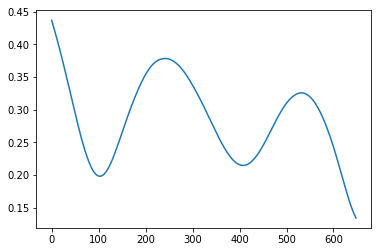

In [28]:
plt.plot(polar['r'])

(-0.32541608529070742,
 0.3943235062721514,
 -0.40906669984115163,
 0.32003682009286971)

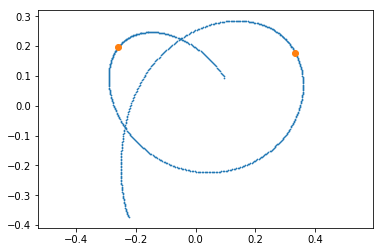

In [29]:
plt.scatter(cartesian['x'], cartesian['y'], s = 0.5)
plt.scatter(cartesian['x'][z], cartesian['y'][z])
plt.axis('equal')

In [10]:
X = np.array(X, dtype = np.float32)
Y = np.array(Y, dtype = np.float32)

In [30]:
X

[[1.3333333329999997, 0.347894693513415, 0.76713295170959417],
 [1.5388888890000008, 0.31112112539639253, 0.85708662657719636],
 [1.5999999999999943, 0.3506796802872085, 0.74927188062789885],
 [1.1944444444444402, 0.2810526383862695, 0.56783301994498414],
 [1.6333333333333293, 0.2550247121582075, 0.64957744452298827],
 [1.2499999999999902, 0.2229743665306525, 0.80057913687385895],
 [1.772222222222217, 0.33444365529036946, 0.79591139638161335],
 [1.37222222222222, 0.273898072417711, 0.72800418753376861],
 [1.1944444444444402, 0.245852281370607, 0.84101428855908134],
 [1.3777777777777702, 0.2269463589800905, 0.87245203670159066],
 [1.61666666666666, 0.35218807358550297, 0.77445221967264177]]

In [31]:
Y

[-2.9032169245858457,
 -1.6640795550695682,
 -2.3185411933930022,
 -2.833777624310655,
 -1.2391857450104569,
 -1.9008643625059847,
 -1.6557735566743963,
 -2.2502680608697654,
 -2.3990810975874783,
 -1.3861191630590852,
 -2.0059799799955655]

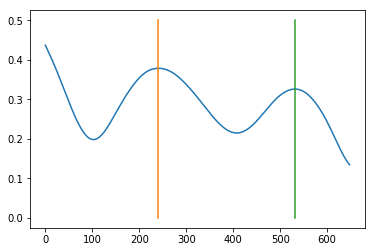

In [32]:
plt.plot(polar['r'])
for i in z:
    plt.plot((i,i), (0, 0.5)) #Sempre va bé veure un gràfic :)

plt.scatter(cartesian['x'], cartesian['y'], s = 1)
plt.scatter(cartesian['x'][z],cartesian['y'][z])
plt.axis('equal')

In [14]:
#Aproximació dels coeficients per tensorflow

In [33]:
X.shape, Y.shape

AttributeError: 'list' object has no attribute 'shape'

In [34]:
#Opcions:
learning_rate = 0.01
training_epochs = 100000
#Create the graph of a logistic regression classifier
nsamples, dim = X.shape

X_t = tf.placeholder(tf.float32, list(X.shape), name = "x")
Y_t = tf.placeholder(tf.float32, list(Y.shape), name = "x")

a = tf.Variable(tf.random_normal([1], mean=2))
b = tf.Variable(tf.random_normal([1], mean=2))
c = tf.Variable(tf.random_normal([1], mean=2))
K = tf.Variable(tf.random_normal([1]))

with tf.device("/gpu:0"):
    aux = K*tf.pow(X[:,0], a)*tf.pow(X[:,1], b)*tf.pow(X[:,2], c)
    cost = tf.reduce_sum(tf.pow(aux-Y, 2))/(2*nsamples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


AttributeError: 'list' object has no attribute 'shape'

In [17]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
costs = []
for epoch in t(range(training_epochs)):
    cost_p, _  = sess.run([cost, optimizer], feed_dict = {X_t: X, Y_t: Y})
    costs += [cost_p]
    if epoch % 1000 == 0:
        print(epoch, cost_p)
a,b,c,K = sess.run([a,b,c,K])

HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

InvalidArgumentError: Cannot assign a device for operation 'Pow_2': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: Pow_2 = Pow[T=DT_FLOAT, _device="/device:GPU:0"](Pow_2/x, Variable_2/read)]]

Caused by op 'Pow_2', defined at:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-840da8947306>", line 16, in <module>
    aux = K*tf.pow(X[:,0], a)*tf.pow(X[:,1], b)*tf.pow(X[:,2], c)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 546, in pow
    return gen_math_ops._pow(x, y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 2873, in _pow
    "Pow", x=x, y=y, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'Pow_2': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: Pow_2 = Pow[T=DT_FLOAT, _device="/device:GPU:0"](Pow_2/x, Variable_2/read)]]


In [53]:
a,b,c,K = a[0],b[0],c[0],K[0]

In [54]:
a

-1.4463944

In [41]:
Y

array([-2.90321684, -1.66407955, -2.31854129, -2.83377767, -1.23918569,
       -1.90086436, -1.65577352, -2.25026798, -2.39908099, -1.38611913,
       -2.00598001], dtype=float32)

In [55]:
au = X[0]

array([ 1.33333337,  0.3478947 ,  0.76713294], dtype=float32)